# i. Perkenalan

**Nama** : Alfarabi

**Dataset** : [Credit Card](https://colab.research.google.com/drive/1SwNL2UKhk_HBAXYpJcHPKEnIx2mSQjM0#scrollTo=kmpgLrHdlKWA)

**Problem Statement** : Pemahaman akan pentingnya pengaturan batas kredit yang tepat pada kartu kredit menjadi krusial dalam mengelola keuangan secara efektif. Penetapan batas kredit yang sesuai dengan profil pemegang kartu akan membantu menghindari risiko keuangan, seperti penumpukan utang yang sulit dilunasi dan risiko gagal bayar. Meskipun batas kredit yang terlalu rendah dapat menjadi kendala dalam memenuhi kebutuhan keuangan, batas kredit yang terlalu tinggi dapat mendorong pengeluaran yang berlebihan. Oleh karena itu, penyedia kartu kredit semakin mengandalkan teknologi dan analisis data untuk menetapkan batas kredit yang optimal, menggabungkan faktor-faktor seperti pendapatan, riwayat kredit, dan kebijakan risiko perusahaan untuk memberikan pengalaman pengguna yang lebih baik dan mengurangi risiko keuangan.

**Objective** : Tujuan dari proyek ini adalah untuk melakukan analisis clustering pada dataset Credit card menggunakan metode K-Means. clustering adalah proses pengelompokan data ke dalam kelompok-kelompok berdasarkan kesamaan fitur tertentu.

# ii. Query SQL

```sql
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id = "green-reporter-417802"
client = bigquery.Client(project=project_id)

credit_card = client.query('''
select * from `ftds-hacktiv8-project.phase1_ftds_005_bsd.credit-card-information`
''').to_dataframe()

df = credit_card

from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd

# Query untuk mengambil data dari BigQuery
df = client.query('''
    SELECT
        CUST_ID,
        BALANCE,
        BALANCE_FREQUENCY,
        PURCHASES,
        ONEOFF_PURCHASES,
        INSTALLMENTS_PURCHASES,
        CASH_ADVANCE,
        PURCHASES_FREQUENCY,
        ONEOFF_PURCHASES_FREQUENCY,
        PURCHASES_INSTALLMENTS_FREQUENCY,
        CASH_ADVANCE_FREQUENCY,
        CASH_ADVANCE_TRX,
        PURCHASES_TRX,
        CREDIT_LIMIT,
        PAYMENTS,
        MINIMUM_PAYMENTS,
        PRC_FULL_PAYMENT,
        TENURE,
    FROM
        `ftds-hacktiv8-project.phase1_ftds_005_bsd.credit-card-information`
    where MOD(CUST_ID, 2)<> 0;
    ''').to_dataframe()
```

# iii. Import Libraries

In [1]:
# libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from feature_engine.outliers import Winsorizer

# elbow & silhouette for PCA
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples

# Model Saving
import pickle
import json

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# iv. Data Loading

Data yang diambil merupakan dataset credit card yang akan dianalisis.

In [2]:
# Load dataset
df_ori = pd.read_csv('P1G6_Set_1_Alfarabi.csv')

# Duplicate dataset
df = df_ori.copy()

Saya akan melakukan pengecekan 10 data teratas dari dataset.

In [3]:
# Show 10 top data
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,500.0,0.000000,NaN,0.000000,8
1,5069,0.000000,0.000000,176.03,176.03,0.00,0.0,0.125,0.125,0.00,0.0,0,1,7000.0,0.000000,NaN,0.000000,8
2,6075,757.964752,0.875000,157.40,157.40,0.00,0.0,0.125,0.125,0.00,0.0,0,6,1200.0,1494.480376,2638.598410,0.000000,8
3,6291,264.566591,0.375000,1150.00,1150.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1200.0,3029.380326,85.428885,0.000000,8
4,7755,440.613643,1.000000,600.00,600.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1000.0,215.316424,137.846006,0.000000,8
5,8299,611.561026,1.000000,765.00,765.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,2000.0,204.464151,146.352314,0.000000,8
6,8629,0.228572,0.125000,60.00,60.00,0.00,0.0,0.125,0.125,0.00,0.0,0,1,1500.0,438.738982,NaN,0.000000,8
7,8805,105.333584,0.375000,306.00,306.00,0.00,0.0,0.125,0.125,0.00,0.0,0,2,6000.0,101.986927,118.324082,0.000000,8
8,7,16.379412,0.454545,178.15,0.00,178.15,0.0,0.250,0.000,0.25,0.0,0,3,5000.0,229.376368,89.613822,0.181818,12
9,91,559.151424,1.000000,94.00,94.00,0.00,0.0,0.250,0.250,0.00,0.0,0,3,5500.0,254.733329,218.279194,0.000000,12


Lalu saya akan melakukan pengecekan pada 10 data terbawah dari dataset.

In [4]:
# Show 10 bottom data
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4465,6809,4438.521324,1.000000,591.84,109.16,482.68,564.365429,0.636364,0.181818,0.454545,0.272727,3,11,17000.0,5552.601399,1094.486286,0.00,11
4466,7211,1135.703750,1.000000,92.07,0.00,92.07,81.509491,0.272727,0.000000,0.181818,0.272727,3,3,1200.0,355.798199,434.689529,0.00,11
4467,8295,185.984965,0.454545,482.24,392.24,90.00,903.843591,0.272727,0.181818,0.090909,0.272727,8,8,1200.0,2333.997439,160.900585,0.25,11
4468,8855,3531.167073,0.900000,797.50,577.83,219.67,5273.226918,0.700000,0.400000,0.500000,0.900000,33,21,4000.0,2979.546700,3052.080103,0.00,10
4469,2389,1917.895730,1.000000,285.07,285.07,0.00,6084.858872,0.363636,0.363636,0.000000,1.090909,28,6,3000.0,5692.682993,556.449635,0.00,11
4470,2345,9629.808851,1.000000,0.00,0.00,0.00,4372.393835,0.000000,0.000000,0.000000,0.545455,9,0,12000.0,2468.988022,2134.295731,0.00,11
4471,6785,1040.030221,1.000000,0.00,0.00,0.00,1390.648290,0.000000,0.000000,0.000000,0.545455,18,0,1400.0,290.129620,287.994171,0.00,11
4472,7347,1322.818587,1.000000,0.00,0.00,0.00,762.301096,0.000000,0.000000,0.000000,0.545455,11,0,1500.0,1035.627320,312.835530,0.00,11
4473,8447,1060.391273,1.000000,0.00,0.00,0.00,1475.858013,0.000000,0.000000,0.000000,0.545455,10,0,2000.0,407.360560,277.084736,0.00,11
4474,1995,3447.674222,1.000000,205.00,205.00,0.00,4548.057776,0.090909,0.090909,0.000000,0.545455,7,1,10500.0,665.239171,817.844662,0.00,11


Setelah itu saya akan mengecek informasi yang ada pada dataset.

In [5]:
# Check dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Informasi yang didapat diatas yaitu:
- 4475 baris
- 18 kolom

Lalu saya akan mengecek apakah ada duplikat data pada dataset.

In [6]:
# Check duplicate data
df.duplicated().sum()

0

Setelah dilakukan pengecekan tidak terdapat duplikat data.

Saya akan mengecek missing value pada dataset.

In [7]:
# Check missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom `MINIMUM_PAYMENTS` sebanyak 155.

Lalu saya mengecek statistik deskriptif pada dataframe.

In [8]:
# Check descriptive data
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4320.000000,4475.000000,4475.000000
mean,4475.000000,1563.205717,0.876933,1003.251343,596.369893,407.110215,984.288554,0.490579,0.202301,0.363886,0.136132,3.301229,14.929162,4494.878630,1740.075430,873.976757,0.150224,11.518212
std,2583.931114,2072.045789,0.238222,2060.034730,1653.425984,880.799744,2060.448056,0.402907,0.298203,0.397603,0.201036,7.134727,25.540814,3609.267706,2827.633858,2436.877272,0.289081,1.328925
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,2238.000000,124.432849,0.888889,39.560000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,376.913051,168.590144,0.000000,12.000000
50%,4475.000000,871.355430,1.000000,360.000000,45.650000,88.620000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,877.494612,313.980229,0.000000,12.000000
75%,6712.000000,2047.570799,1.000000,1102.420000,575.220000,455.885000,1138.887754,0.916667,0.250000,0.750000,0.250000,4.000000,17.000000,6500.000000,1911.596530,819.371080,0.125000,12.000000
max,8949.000000,18495.558550,1.000000,41050.400000,40624.060000,14686.100000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,347.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Informasi diatas menunjukan nilai count, mean, std, min, 25%, 50%, 75%, max dari setiap kolom.

Setelah itu saya mengecek nama-nama kolom yang ada pada dataset.

In [9]:
# Check name of columns
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Berikut adalah deskripsi dari kolom yang ada pada dataset.

| table_name | column_name | data_type | description |
|---|---|---|---|
| credit-card-information | CUST_ID | INT64 | Identification of Credit Card holder |
| credit-card-information | BALANCE | FLOAT64 | Balance amount left in their account to make purchases |
| credit-card-information | BALANCE FREQUENCY | FLOAT64 | How frequently the Balance is updated, score between 0 and 1 (1 frequently updated, 0 = not frequently updated) |
| credit-card-information | PURCHASES | FLOAT64 | Amount of purchases made from account |
| credit-card-information | ONEOFF PURCHASES | FLOAT64 | Maximum purchase amount done in one-go |
| credit-card-information | INSTALLMENTS_PURCHASES | FLOAT64 | Amount of purchase done in installment |
| credit-card-information | CASH ADVANCE | FLOAT64 | Cash in advance given by the user |
| credit-card-information | PURCHASES FREQUENCY | FLOAT64 | How frequently the Purchases are being made, score between 0 and 1 (1 frequently purchased, 0 not frequently purchased) |
| credit-card-information | ONEOFF_PURCHASES_FREQUENCY | FLOAT64 | How frequently Purchases are happening in one-go (1 frequently purchased. 0 = not frequently purchased) |
| credit-card-information | PURCHASES_INSTALLMENTS_FREQUENCY | FLOAT64 | How frequently purchases in installments are being done (1 = frequently done, 0 not frequently done) |
| credit-card-information | CASH ADVANCE FREQUENCY | FLOAT64 | How frequently the cash in advance being paid |
| credit-card-information | CASH_ADVANCE_TRX | INT64 | Number of Transactions made with 'Cash in Advanced' |
| credit-card-information | PURCHASES_TRX | INT64 | Numbe of purchase transactions made |
| credit-card-information | CREDIT LIMIT | FLOAT64 | Limit of Credit Card for user |
| credit-card-information | PAYMENTS | FLOAT64 | Amount of Payment done by user |
| credit-card-information | MINIMUM_PAYMENTS | FLOAT64 | Minimum amount of payments made by user |
| credit-card-information | PRC_FULL_PAYMENT | FLOAT64 | Percent of full payment paid by user |
| credit-card-information | TENURE | INT64 | Tenure of credit card service for user |

# v. Exploratory Data Analysis (EDA)

1. Objective: Melihat distribusi balance

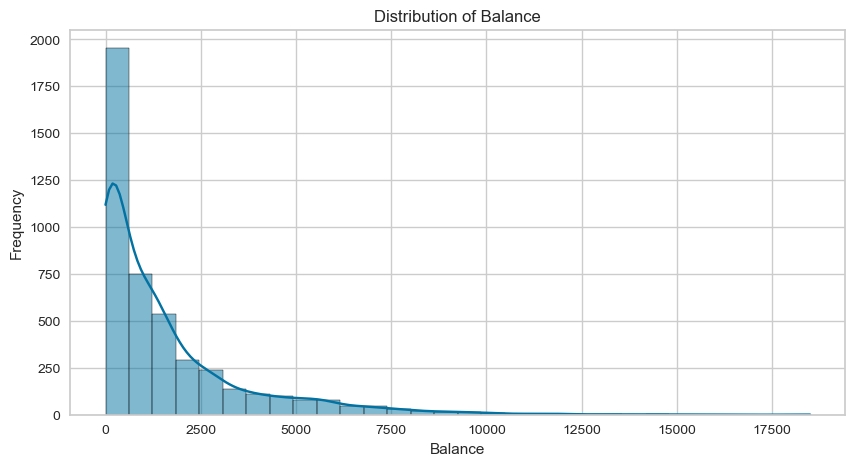

In [10]:
# Histogram untuk distribusi variabel numerik
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='BALANCE', bins=30, kde=True)
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()

Berdasarkan grafik tersebut, terlihat bahwa ada lebih banyak orang dengan saldo rekening yang lebih rendah daripada yang dengan saldo lebih tinggi. Jumlah saldo terkonsentrasi antara $250 dan $750. Ada juga beberapa orang dengan saldo se tinggi $1750.

2. Objective: Menganalisis korelasi antara purchases dan jumlah payments.

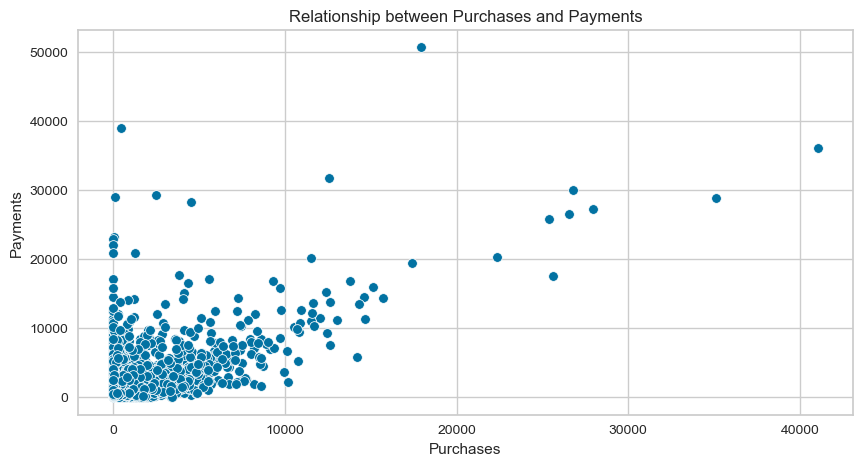

In [11]:
# Scatter plot untuk melihat hubungan antara dua variabel
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='PURCHASES', y='PAYMENTS')
plt.title('Relationship between Purchases and Payments')
plt.xlabel('Purchases')
plt.ylabel('Payments')
plt.show()

Grafik menunjukkan adanya korelasi positif antara payments dan purchases, yang berarti bahwa ketika jumlah payments meningkat, jumlah purchases juga meningkat.

3. Objective: Melihat korelasi antara masing-masing kolom.

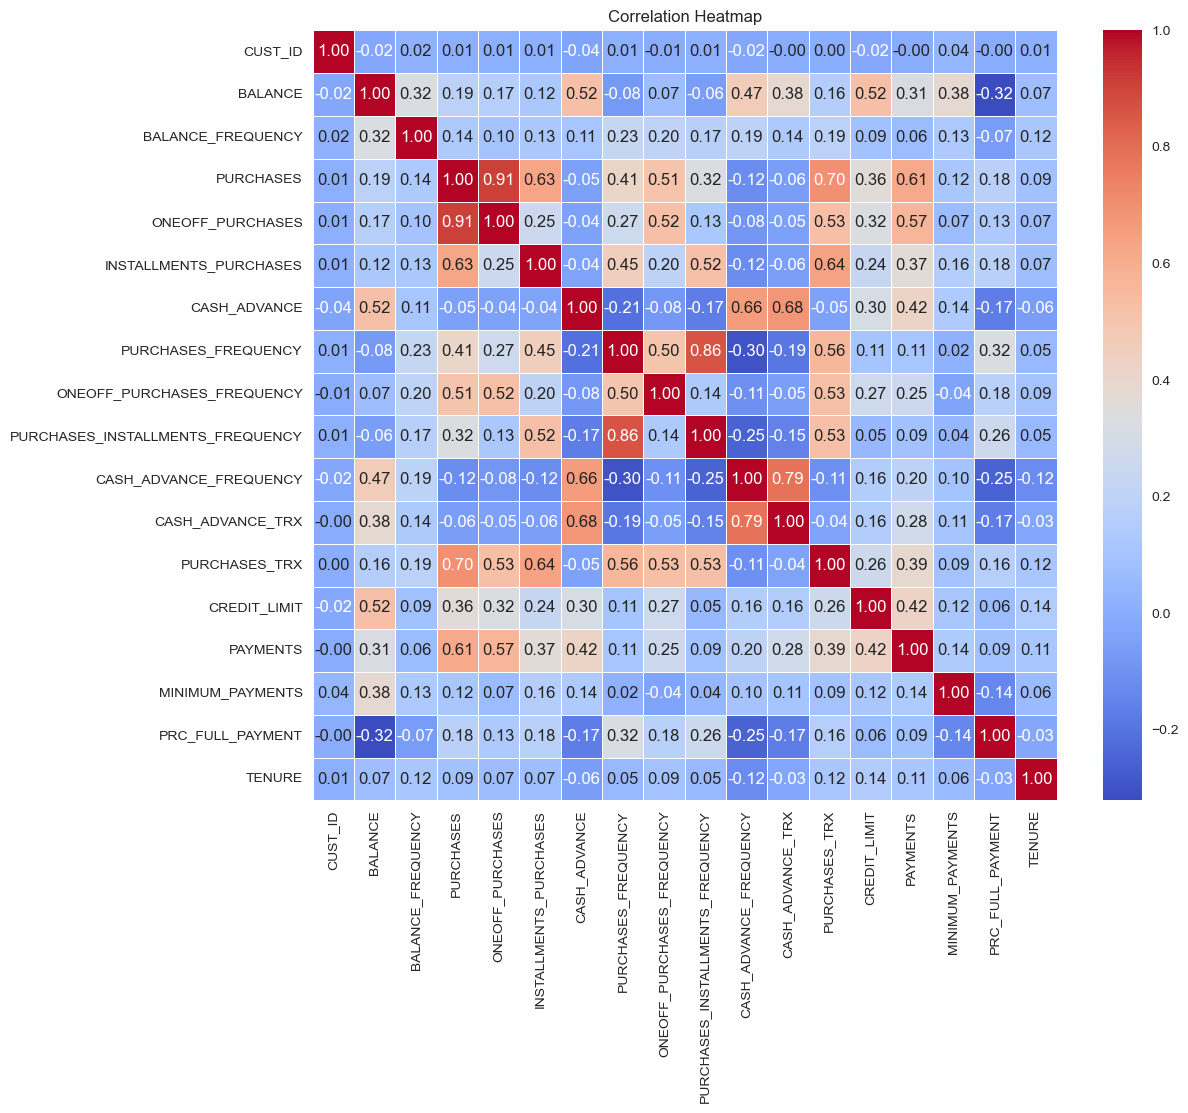

In [12]:
# Heatmap korelasi antar variabel numerik
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Dari heatmap diatas menunjukan warna yang lebih terang atau lebih gelap mengindikasikan tingkat korelasi yang lebih tinggi atau lebih rendah. Insight ini membantu untuk mengidentifikasi hubungan positif atau negatif antar variabel, yang dapat membimbing analisis lebih lanjut.

4. Objective: Melihat distribusi tenure

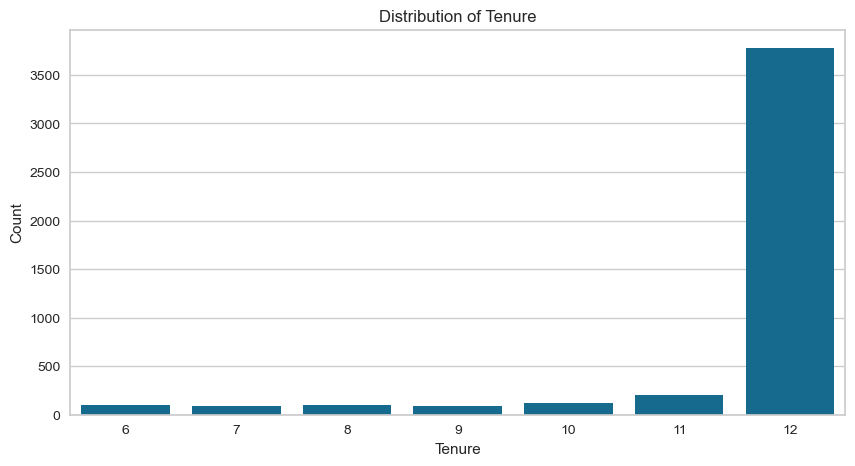

In [13]:
# Bar plot untuk melihat distribusi variabel kategorikal
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='TENURE')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

Dari bar plot diatas menunjukan bahwa rata-rata orang memilih tenure 12 bulan.

# vi. Feature Engineering

Pertama saya akan menghapus kolom yang tidak diperlukan.

In [14]:
# Menghapus kolom 'CUST_ID' dari DataFrame df
df = df.drop(columns='CUST_ID')

# Menampilkan lima baris pertama DataFrame df setelah penghapusan kolom 'CUST_ID'
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


### Missing Handling Value

Pada proses ini saya akan melakukan missing value handling.

In [15]:
# Check missing value
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Terdapat missing value pada kolom `MINIMUM_PAYMENTS` sebanyak 155.

Lalu saya mengisi missing value dengan nilai mean dari kolom tersebut. guna untuk menjaga struktur data dan menghindari kehilangan banyak informasi.

In [16]:
# Mengisi nilai-nilai yang hilang (NaN) dalam DataFrame df dengan rata-rata dari setiap kolom
df.fillna(df.mean(), inplace=True)

Setelah itu saya akan memastikan apakah missing value sudah terisi atau belum.

In [17]:
# Check missing value after handling
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

Sudah tidak ada missing value pada dataset.

### Outlier Handling

Disini saya melakukan looping dengan bertujuan untuk memisahkan numerical dan categorical untuk dilakukan handling outlier dengan asumsi jumlah unique value yang dibawah 11 tidak akan dilakukan handling outlier.

In [18]:
# Membuat penampung numerical dan categorical
numerical = []
categorical_num = []

# Loop melalui setiap kolom numerik dalam num_col
for i in df:
    if df[i].nunique()>11:
        numerical.append(i)
    else:
        categorical_num.append(i)

# Cetak daftar kolom numerik dan kolom numerical dan categorical
print(f'numerical columns: {numerical}')
print(print(f'categorical numeric columns: {categorical_num}'))

numerical columns: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']
categorical numeric columns: ['TENURE']
None


Lalu saya akan mengecek nilai skew sebelum dilakukan outlier handling yang berfungsi untuk membandingkan nilai skew antara sebelum dan sesudah outlier handling.

In [19]:
# Checking skew
df.skew()

BALANCE                              2.329009
BALANCE_FREQUENCY                   -2.026530
PURCHASES                            7.071706
ONEOFF_PURCHASES                     9.951057
INSTALLMENTS_PURCHASES               6.330630
CASH_ADVANCE                         5.638109
PURCHASES_FREQUENCY                  0.058755
ONEOFF_PURCHASES_FREQUENCY           1.548319
PURCHASES_INSTALLMENTS_FREQUENCY     0.508296
CASH_ADVANCE_FREQUENCY               1.834211
CASH_ADVANCE_TRX                     6.420104
PURCHASES_TRX                        4.747507
CREDIT_LIMIT                         1.498948
PAYMENTS                             5.747503
MINIMUM_PAYMENTS                    14.930445
PRC_FULL_PAYMENT                     1.975238
TENURE                              -2.954159
dtype: float64

Setelah itu saya akan membagi menjadi nilai normal, skew, dan extreme skew.

In [20]:
# Inisialisasi daftar untuk menampung fitur dengan tingkat skewness
normal = []
skew = []
extreme_skew = []

# Iterasi melalui fitur numerik
for i in numerical:
    # Menghitung skewness dari setiap fitur
    skewness = df[i].skew()
    # Memisahkan fitur berdasarkan tingkat skewness
    if -0.5 < skewness < 0.5:
        normal.append(i)
    elif -1 <= skewness <= -0.5 or 0.5 <= skewness <=1:
        skew.append(i)
    elif skewness < 1 or skewness > 1:
        extreme_skew.append(i)

# Menampilkan hasil klasifikasi fitur berdasarkan skewness
print('normal:', normal)
print('skew:', skew)
print('extreme skew:', extreme_skew)

normal: ['PURCHASES_FREQUENCY']
skew: ['PURCHASES_INSTALLMENTS_FREQUENCY']
extreme skew: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


Pada nilai normal saya akan melakukan triming.

In [21]:
# Menghapus outlier pada dataset dengan metode normal (z-score)
def drop_outliers_normal(df, normal):
    for col in normal:
        avg = df[col].mean()
        std = df[col].std()
        upper_limit =  avg + 3 * std
        lower_limit = avg - 3 * std
        df.drop(df[(df[col] > upper_limit) | (df[col] < lower_limit)].index, inplace=True)

# Menghilangkan outlier dengan metode normal pada fitur-fitur tertentu
drop_outliers_normal(df, ['PURCHASES_FREQUENCY'])


Pada nilai skew dan extreme skew saya akan melakukan caping.

In [22]:
# Capping the skewed distribution
winsoriser_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=1.5,
                             variables=skew)

# Capping the extreme skewed distribution
winsoriser_extreme_skewed = Winsorizer(capping_method='iqr',
                             tail='both',
                             fold=3,
                             variables=extreme_skew)

Lalu menggabungkan data yang telah dilakukan handling outlier ke dalam variabel df_clean.

In [23]:
# Mengaplikasikan metode winsorizing pada dataset untuk mengatasi skewness yang teridentifikasi
df_clean = winsoriser_skewed.fit_transform(df)

# Mengaplikasikan metode winsorizing ekstrem pada dataset untuk menangani skewness yang sangat ekstrim
df_clean = winsoriser_extreme_skewed.fit_transform(df)

Setelah itu saya melakukan pengecekan apakah handling outlier telah berhasil atau belum.

In [24]:
# Check skew after outier handling
df_clean.skew()

BALANCE                             1.715785
BALANCE_FREQUENCY                  -1.437962
PURCHASES                           1.785908
ONEOFF_PURCHASES                    1.707236
INSTALLMENTS_PURCHASES              1.752872
CASH_ADVANCE                        1.674018
PURCHASES_FREQUENCY                 0.058755
ONEOFF_PURCHASES_FREQUENCY          1.548319
PURCHASES_INSTALLMENTS_FREQUENCY    0.508296
CASH_ADVANCE_FREQUENCY              1.769415
CASH_ADVANCE_TRX                    1.792205
PURCHASES_TRX                       1.738371
CREDIT_LIMIT                        1.421481
PAYMENTS                            1.728184
MINIMUM_PAYMENTS                    1.806488
PRC_FULL_PAYMENT                    1.440584
TENURE                             -2.954159
dtype: float64

Saya akan menampilkan histogram dan boxplot untuk melihat distribusi data.

Kolom inflation sebelum dilakukan capping


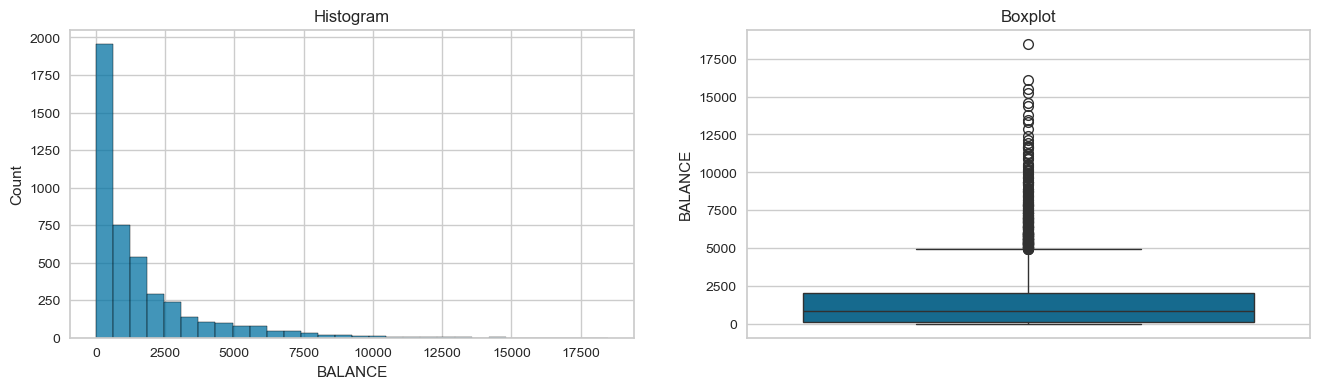


 Kolom inflation setelah dilakukan Capping


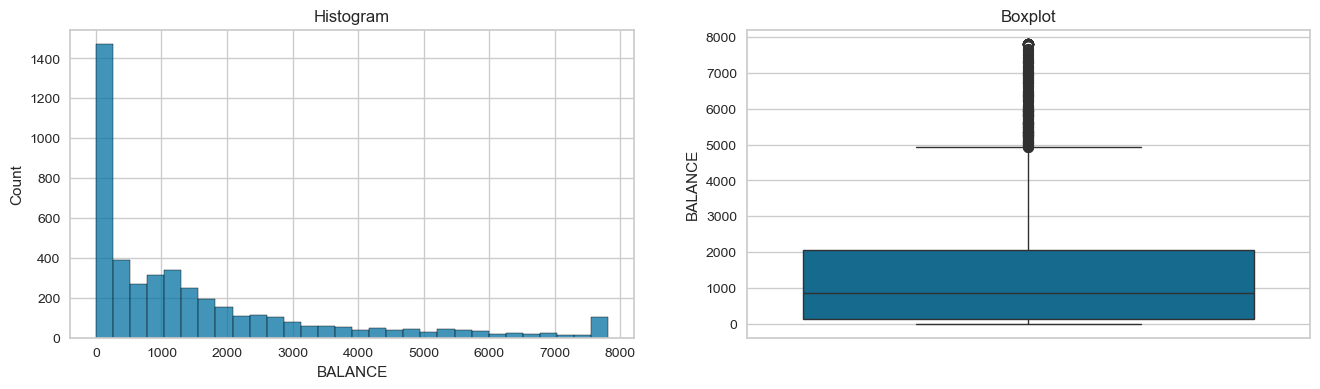

In [25]:
# Membuat fungsi untuk menampilkan histogram dan boxplot dari kolom 
def outliers_plots(df, variabel):    
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variabel], bins=30)
    plt.title('Histogram')
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variabel])
    plt.title('Boxplot')
    plt.show()

# Melihat histogram dan boxplot kolom inflation
print('Kolom inflation sebelum dilakukan capping')
outliers_plots(df, 'BALANCE')
print('\n Kolom inflation setelah dilakukan Capping')
outliers_plots(df_clean, 'BALANCE')

### Feature Scaling

Pada feature scaling saya menggunakan preprocessing `MinMaxScaler` karena data terdistribusi tidak normal.

In [26]:
# Scaler data
scaler = MinMaxScaler()

Lalu saya melakukan scaling pada data yang sudah dilakukan handling outlier, dan memasukan data yang telah discaling kedalam variabel `scaled_data`.

In [27]:
# Standard scaling pada fitur-fitur dalam DataFrame
scaled_data = scaler.fit_transform(df_clean)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)

scaled_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.000490,0.00000,0.010487,0.019558,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0000,0.015385,0.021277,0.000000,0.292831,0.0,0.333333
1,0.000000,0.00000,0.041023,0.076506,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0000,0.015385,0.328605,0.000000,0.292831,0.0,0.333333
2,0.096964,0.71875,0.036681,0.068409,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0000,0.092308,0.054374,0.229368,0.884090,0.0,0.333333
3,0.033845,0.00000,0.268003,0.499809,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0000,0.015385,0.054374,0.464939,0.028618,0.0,0.333333
4,0.056366,1.00000,0.139828,0.260770,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0.0000,0.015385,0.044917,0.033046,0.046181,0.0,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,1.000000,1.00000,0.000000,0.000000,0.0,0.959795,0.000000,0.000000,0.0,0.545455,0.5625,0.000000,0.565012,0.378932,0.715117,0.0,0.833333
4471,0.133047,1.00000,0.000000,0.000000,0.0,0.305265,0.000000,0.000000,0.0,0.545455,1.0000,0.000000,0.063830,0.044528,0.096490,0.0,0.833333
4472,0.169224,1.00000,0.000000,0.000000,0.0,0.167335,0.000000,0.000000,0.0,0.545455,0.6875,0.000000,0.068558,0.158945,0.104813,0.0,0.833333
4473,0.135652,1.00000,0.000000,0.000000,0.0,0.323969,0.000000,0.000000,0.0,0.545455,0.6250,0.000000,0.092199,0.062520,0.092834,0.0,0.833333


### Feature Selection

Pada proses feature selection saya menggunakan `PCA` untuk menyederhanakan variabel.

In [28]:
# Dimensionality Reduction using PCA
pca = PCA()
pca.fit(scaled_data)

PCA()

Lalu saya akan menampilkan plot untuk melihat cumulative of explained variance ratio.

Text(0, 0.5, 'Explained Variance Ratio - Cummulative')

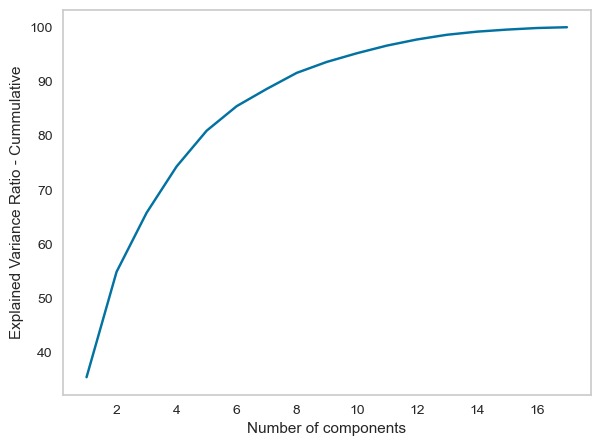

In [29]:
# Plot the Cummulative of Explained Variance Ratio
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.grid()
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio - Cummulative')

Lalu saya menentukan jumlah komponen utama yang diperlukan untuk mencapai target kumulatif variance ratio 0.95.

In [30]:
# Check the number of features if we want to retain 95 % of the information
cumsum = np.cumsum(pca.explained_variance_ratio_)
num_features = np.argmax(cumsum >= 0.95) + 1

num_features

10

Setelah mengetahui jumlah komponen yang akan dipakai 10 kolom, saya akan melakukan reduksi dimensi pada data (scaled_data) menjadi 10 komponen utama (principal components) yang paling signifikan.

In [31]:
# Train the model with 95 % of the original dataset information
pca = PCA(n_components=10)
pca.fit(scaled_data)

# Transform the scaled data using the trained PCA model
scaled_data = pca.transform(scaled_data)

# vii. Model Definition

Setelah mengetahui jumlah komponen yang akan dipakai, saya akan melakukan clustering dengan menggunakan KMeans.

In [32]:
# Inisialisasi KMeans
kmeans = KMeans(init='k-means++', random_state=30)

Saya akan menampilkan clustering dengan `Elbow` methode untuk menentukan jumlah cluster yang akan dipakai.

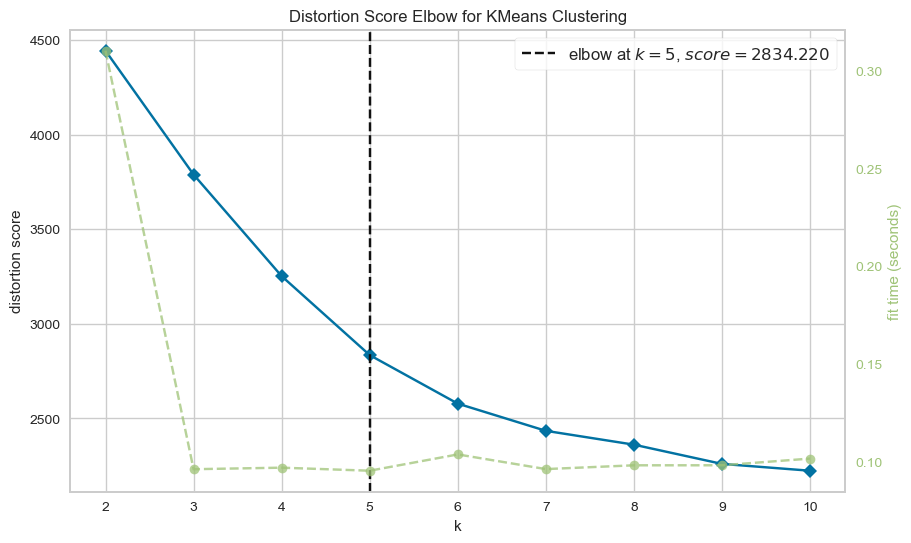

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
# Visualisasi metode elbow untuk menentukan jumlah cluster optimal
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(kmeans, k=10)  # Menentukan rentang jumlah cluster yang ingin dievaluasi
visualizer.fit(scaled_data)  # Melakukan fit pada data yang sudah di-scaling
visualizer.show()  # Menampilkan plot

Dari Elbow methode dapat dilihat jumlah cluster yang akan dipakai sebanyak 5 cluster.

Lalu saya akan menentukan jumlah cluster dengan menggukan `Silhouette` untuk memberikan sebuah ukuran tentang seberapa mirip sebuah objek terhadap objek-objek di dalam klaster yang sama dibandingkan dengan klaster lainnya.

In [34]:
# Function to create Silhouette Plot
def plot_silhouette(range_n_clusters, X, random_state):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.27702530370221257
For n_clusters = 3 The average silhouette_score is : 0.24986434095252696
For n_clusters = 4 The average silhouette_score is : 0.23699015673114923
For n_clusters = 5 The average silhouette_score is : 0.2525354672221468
For n_clusters = 6 The average silhouette_score is : 0.25985217285636103
For n_clusters = 7 The average silhouette_score is : 0.2597597009571283
For n_clusters = 8 The average silhouette_score is : 0.2604340076557994
For n_clusters = 9 The average silhouette_score is : 0.2649452199268662


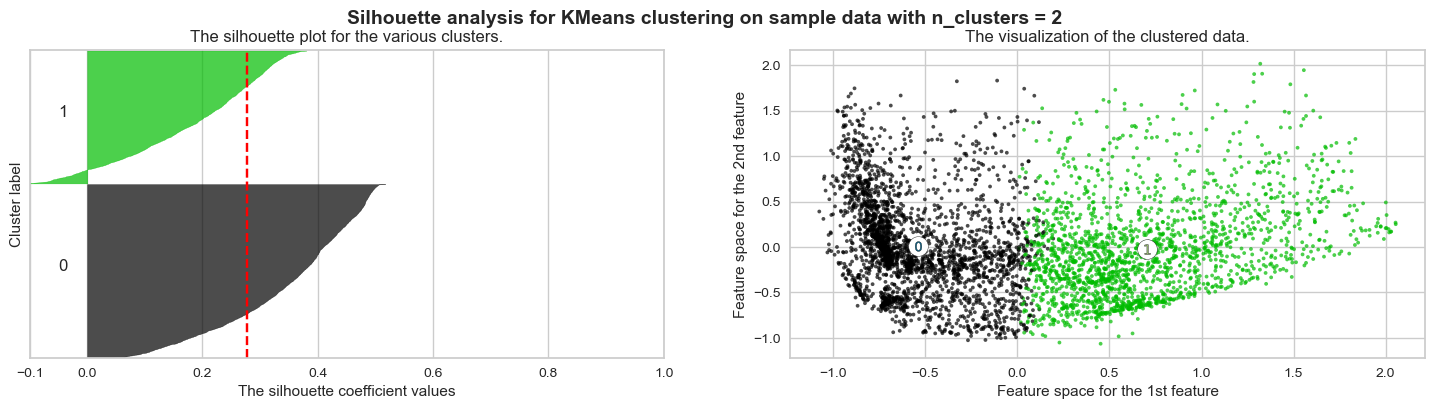

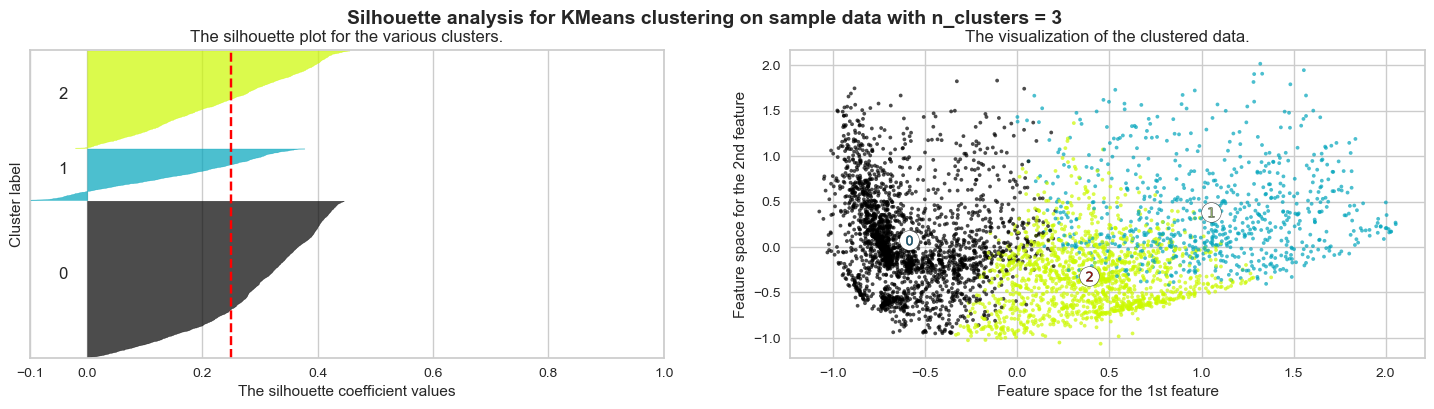

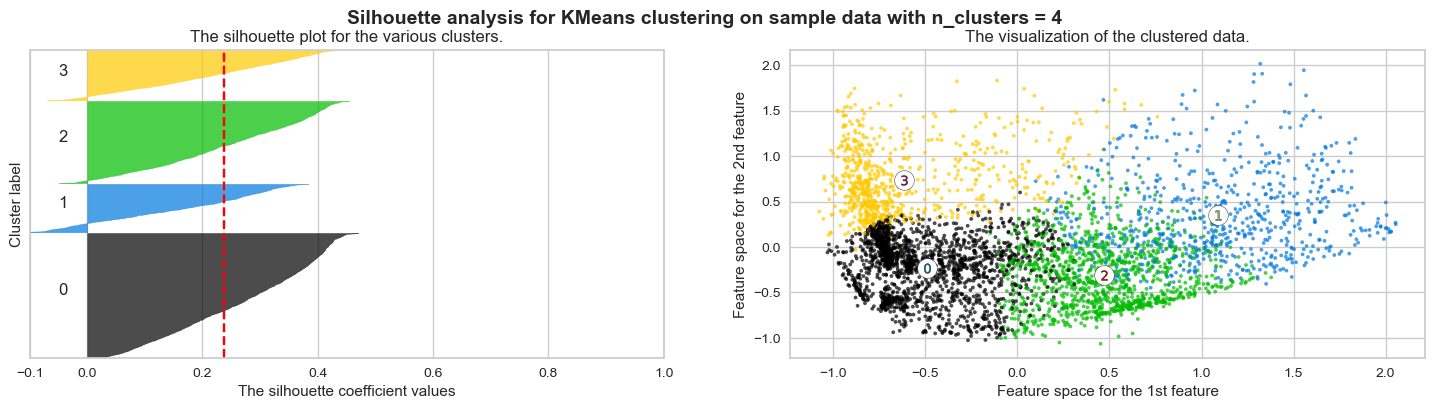

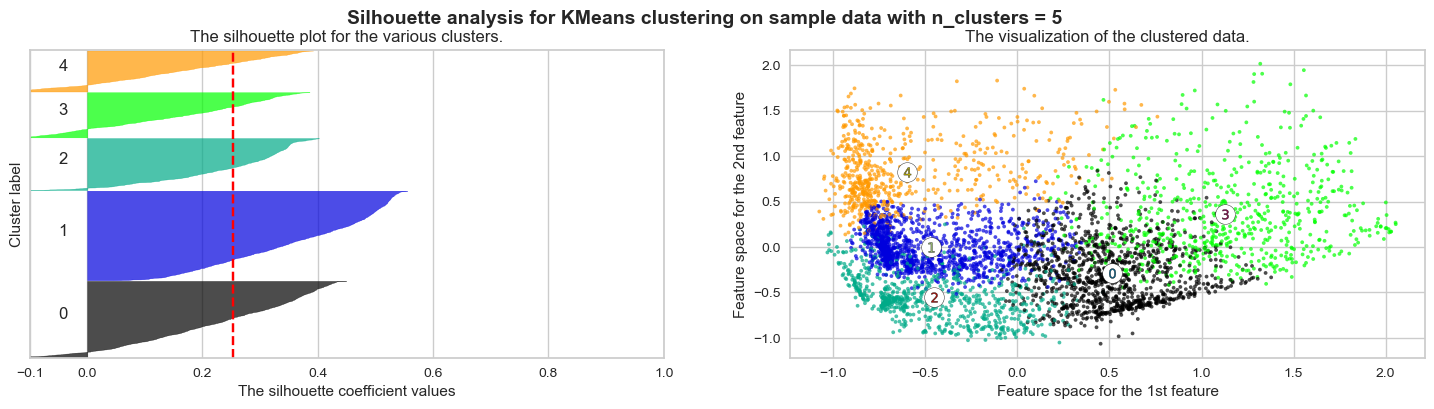

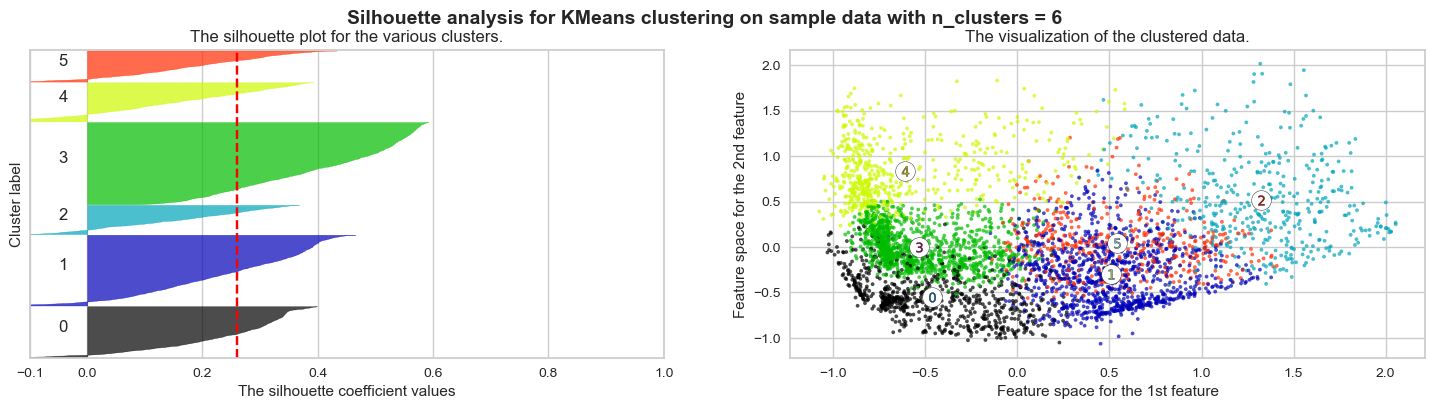

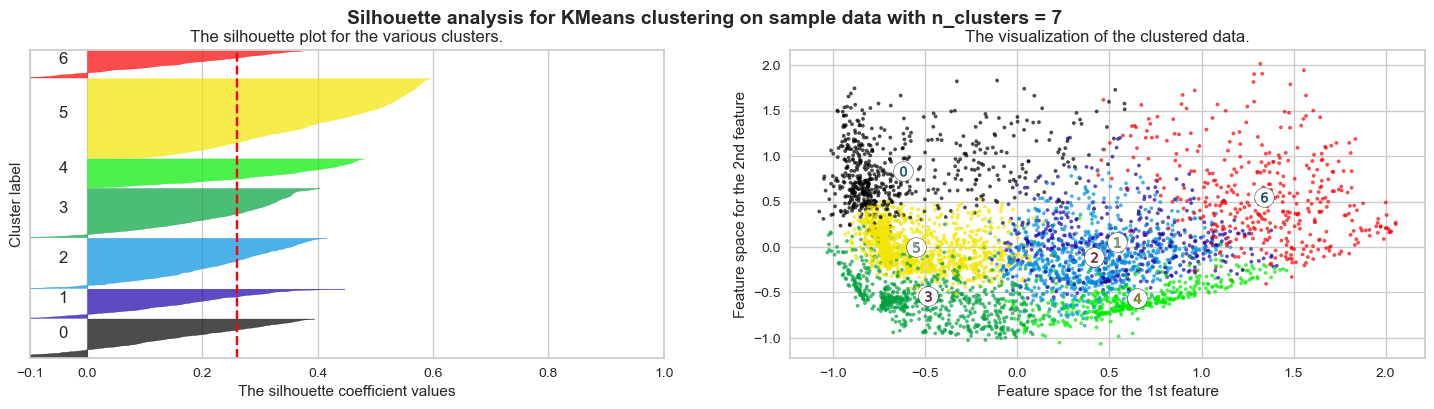

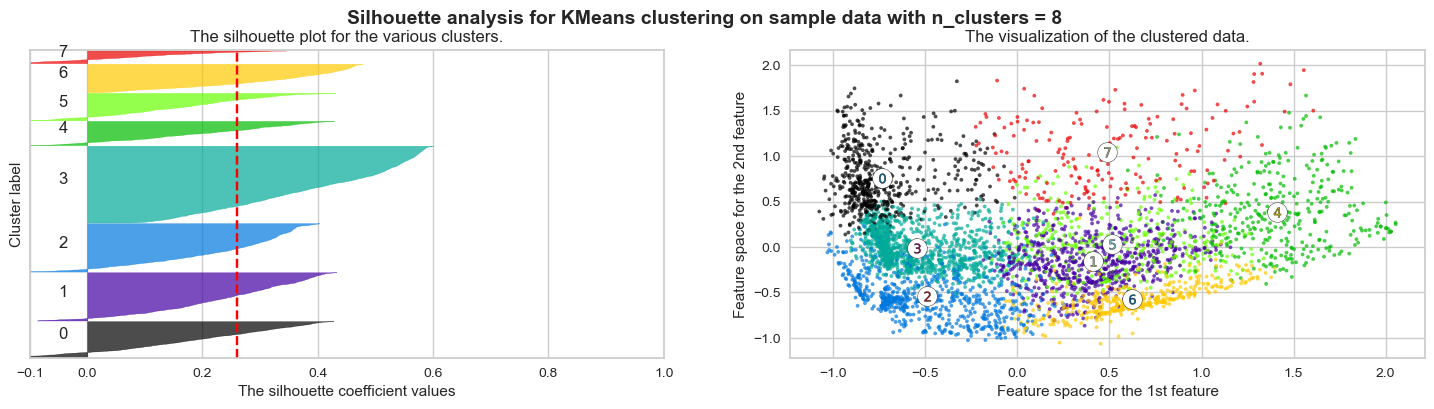

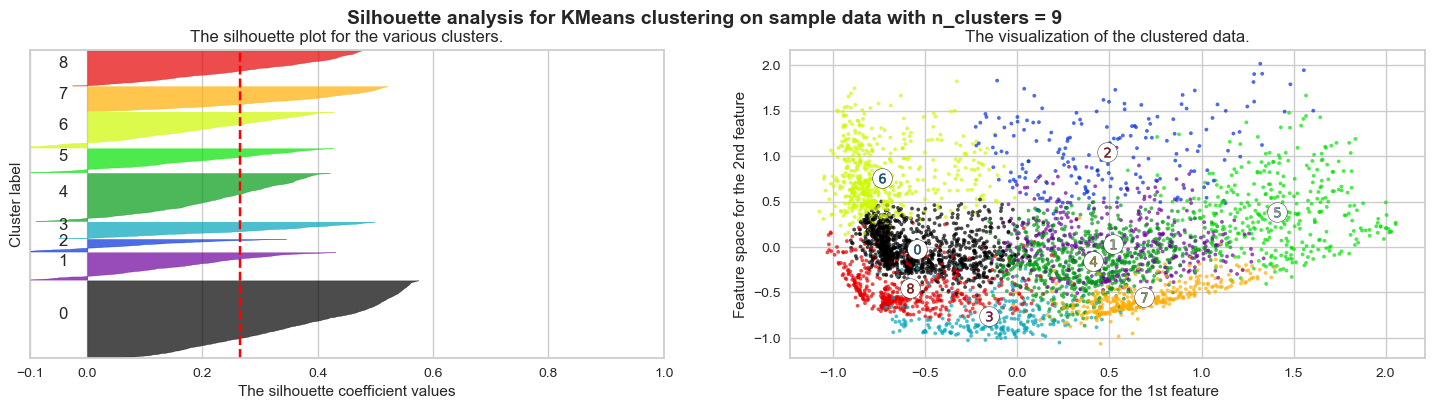

In [35]:
# Display the Silhouette Score and Plot Silhouette Plot
max_cluster = 10
plot_silhouette(range(2, max_cluster), scaled_data, random_state=40)

Dari hasil silhouette dapat dilihat bahwa tingkat kemiripian yang paling mirip terdapat pada cluster 5.

# viii. Model Training

Setelah menentukan jumlah cluster yang dipakai, saya akan melakukan training model k-means dengan menggunkan 5 cluster.

In [36]:
# Melakukan training model k-means menggunakan 5 cluster
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 40)

# Melakukan prediksi terhadap dataset menggunakan k-means
clusters = km.fit_predict(scaled_data)
clusters

array([2, 2, 1, ..., 1, 1, 4])

Lalu saya membuat kolom baru hasil clustering ke dalam dataframe.

In [37]:
# Membuat kolom CLUSTER pada dataset original untuk menyimpan nilai prediksi
df['cluster'] = clusters

df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,3.833185,0.125,45.00,45.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,500.0,0.000000,873.976757,0.0,8,2
1,0.000000,0.000,176.03,176.03,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,7000.0,0.000000,873.976757,0.0,8,2
2,757.964752,0.875,157.40,157.40,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,6,1200.0,1494.480376,2638.598410,0.0,8,1
3,264.566591,0.375,1150.00,1150.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1200.0,3029.380326,85.428885,0.0,8,2
4,440.613643,1.000,600.00,600.00,0.0,0.000000,0.125000,0.125000,0.0,0.000000,0,1,1000.0,215.316424,137.846006,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,9629.808851,1.000,0.00,0.00,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11,4
4471,1040.030221,1.000,0.00,0.00,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11,4
4472,1322.818587,1.000,0.00,0.00,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11,1
4473,1060.391273,1.000,0.00,0.00,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11,1


Setelah itu saya akan menampilkan visualisasi 2D hasil setelah  dilakukan clsutering.

<Axes: >

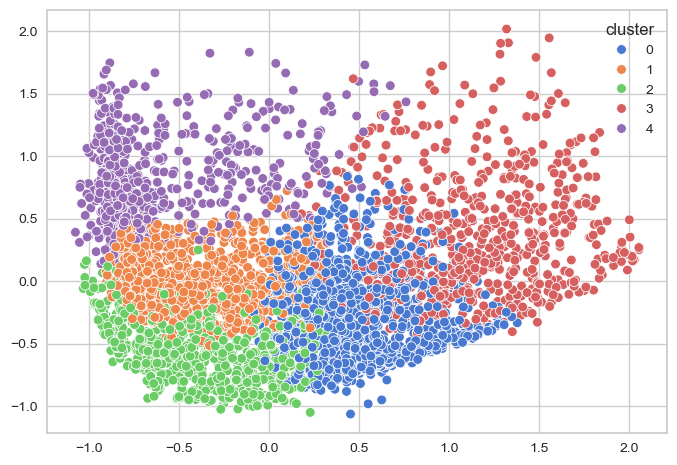

In [38]:
# Cluster visualization in 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(scaled_data)

scaled_data_pca_2d = pca_2d.fit_transform(scaled_data)

sns.scatterplot(x=scaled_data_pca_2d[:,0], y=scaled_data_pca_2d[:,1], hue=df['cluster'], palette='muted')

Grafik PCA 2D ini menunjukan bahwa jumlah cluster yang dimiliki ada 5 yaitu cluster 0 sampai cluster 4.

Lalu saya akan menghitung rata-rata tiap kolomnya berdasarkan cluster.

In [39]:
# Melakukan groupby berdasarkan cluster dan menghitung rata-rata
df.groupby('cluster').mean().reset_index()

,cluster,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0,721.507050,0.939386,800.675597,169.155080,631.787897,232.995804,0.902712,0.130566,0.817147,0.047288,0.881462,18.210339,3501.762275,974.439843,788.727401,0.270879,11.441176
1,1,1473.025340,0.985046,289.748528,234.545030,55.254332,536.898037,0.194098,0.125084,0.070423,0.125790,2.148710,3.528832,3309.256449,876.830234,755.376913,0.018874,11.653263
2,2,182.696563,0.439331,351.004719,241.092549,109.940928,429.325326,0.242102,0.087237,0.147034,0.055219,1.064052,3.883660,3821.764772,1242.173714,253.038268,0.202048,11.181699
3,3,2282.640742,0.978241,4143.032030,2794.740030,1349.194256,769.860082,0.927637,0.697518,0.658609,0.094431,2.575940,54.257143,7166.616541,4177.752127,1135.551004,0.261560,11.867669
4,4,4275.451751,0.967564,306.889702,209.743802,97.203289,4289.665365,0.205934,0.104723,0.112854,0.471578,13.925620,4.418182,6833.974455,2990.720235,1788.084924,0.024702,11.408264


# ix. EDA After Clustering

1. Objective: Melihat distribusi balance setiap cluster.

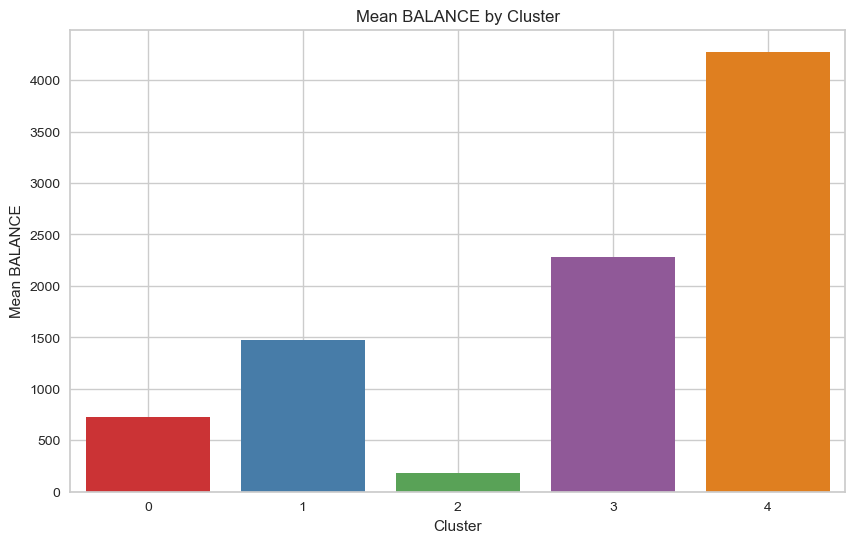

In [40]:
# Calculate mean BALANCE by cluster
balance_mean_by_cluster = df.groupby('cluster')['BALANCE'].mean().reset_index()

# Create bar plot for mean BALANCE by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=balance_mean_by_cluster, x='cluster', y='BALANCE', palette='Set1')
plt.title('Mean BALANCE by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean BALANCE')
plt.grid(True)
plt.show()

Dari grafik diatas menunjukan bahwa cluster yang memiliki balance tertinggi yaitu cluster 4 dan yang memiliki balance terendah adalah cluster 2.

2. Objective: Melihat distribusi purchases setiap cluster.

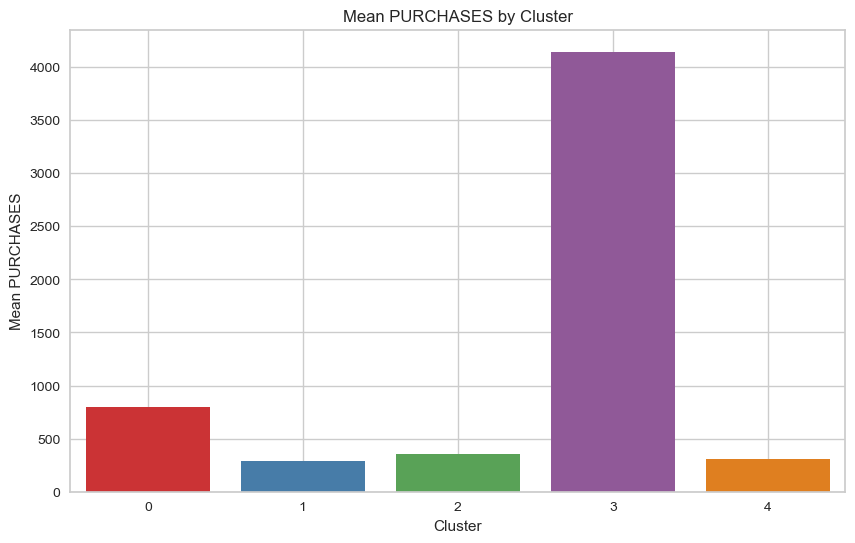

In [41]:
# Calculate mean PURCHASES for each cluster
mean_purchases_by_cluster = df.groupby('cluster')['PURCHASES'].mean().reset_index()

# Create bar plot for mean PURCHASES by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_purchases_by_cluster, x='cluster', y='PURCHASES', palette='Set1')
plt.title('Mean PURCHASES by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean PURCHASES')
plt.grid(True)
plt.show()

Dari grafik diatas menunjukan bahwa cluster yang memiliki purchases tertinggi yaitu cluster 3 dan yang memiliki purchases terendah adalah cluster 1.

3. Objective: Melihat distribusi credit limit setiap cluster.

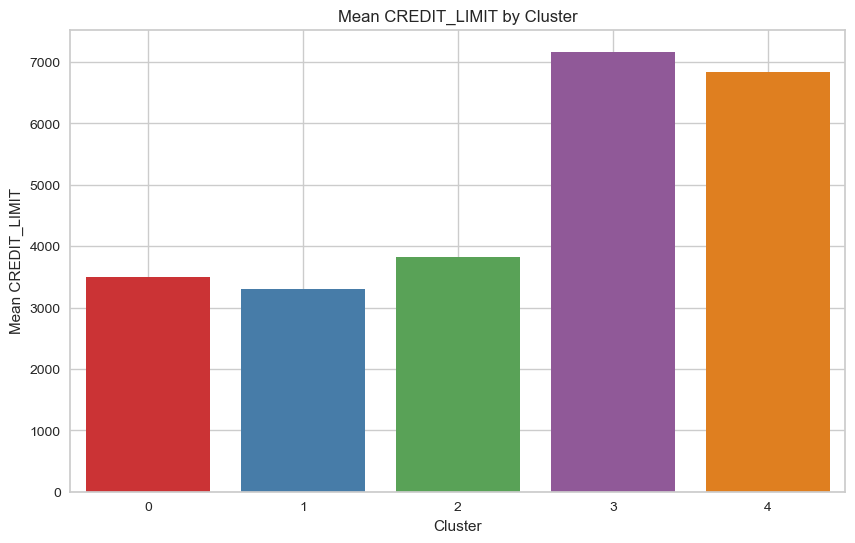

In [42]:
# Create bar plot for CREDIT_LIMIT by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='cluster', y='CREDIT_LIMIT', palette='Set1', ci=None)
plt.title('Mean CREDIT_LIMIT by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean CREDIT_LIMIT')
plt.grid(True)
plt.show()

Dari grafik diatas menunjukan bahwa cluster yang memiliki credit limit tertinggi yaitu cluster 3 dan yang memiliki credit limit terendah adalah cluster 1.

4. Objective: Melihat distribusi payments setiap cluster.

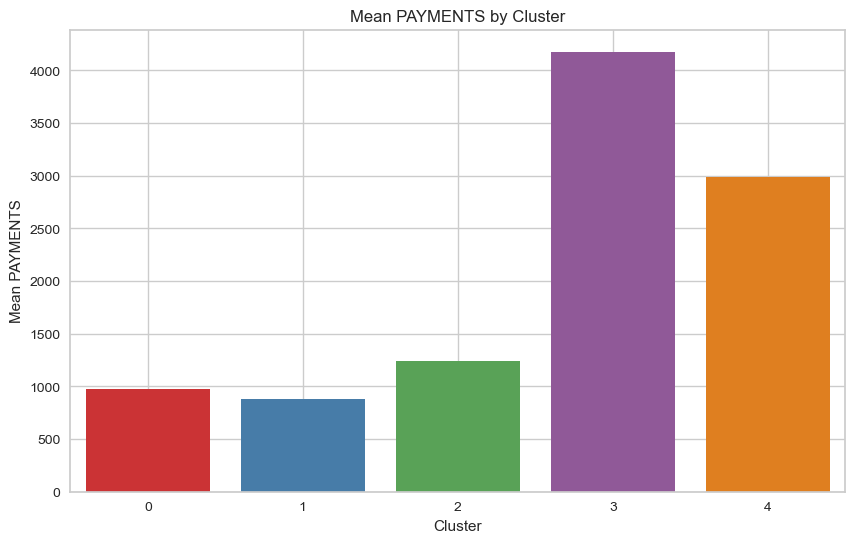

In [43]:
# Calculate the mean PAYMENTS by cluster
mean_PAYMENTS = df.groupby('cluster')['PAYMENTS'].mean().reset_index()

# Create bar plot for mean PAYMENTS by cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_PAYMENTS, x='cluster', y='PAYMENTS', palette='Set1')
plt.title('Mean PAYMENTS by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean PAYMENTS')
plt.grid(True)
plt.show()

Dari grafik diatas menunjukan bahwa cluster yang memiliki payments tertinggi yaitu cluster 3 dan yang memiliki payments terendah adalah cluster 1.

5. Objective: Melihat distribusi minimum payments setiap cluster.

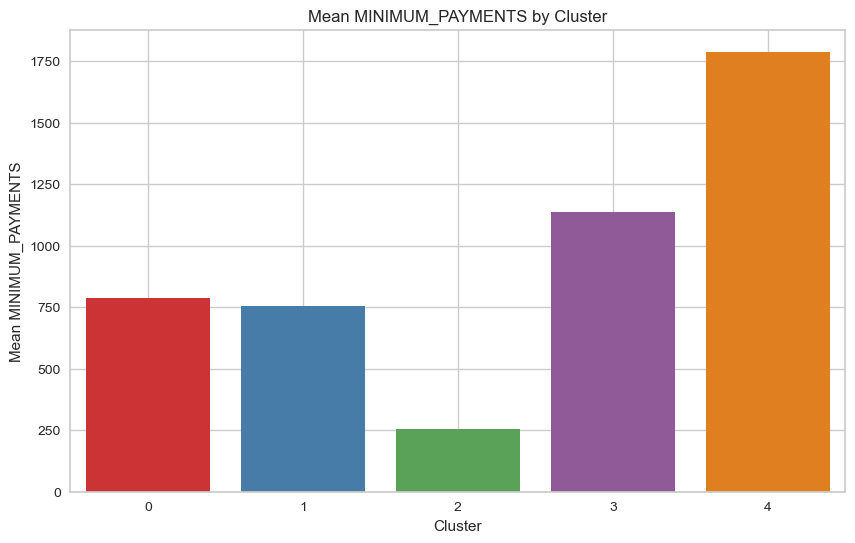

In [44]:
# Calculate mean MINIMUM_PAYMENTS by Cluster
mean_purchases_by_cluster = df.groupby('cluster')['MINIMUM_PAYMENTS'].mean().reset_index()

# Create bar plot for mean MINIMUM_PAYMENTS by Cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_purchases_by_cluster, x='cluster', y='MINIMUM_PAYMENTS', palette='Set1')
plt.title('Mean MINIMUM_PAYMENTS by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean MINIMUM_PAYMENTS')
plt.grid(True)
plt.show()

Dari grafik diatas menunjukan bahwa cluster yang memiliki minimum payments tertinggi yaitu cluster 4 dan yang memiliki minimum payments terendah adalah cluster 2.

6. Objective: Melihat distribusi nasabah pada cluster.

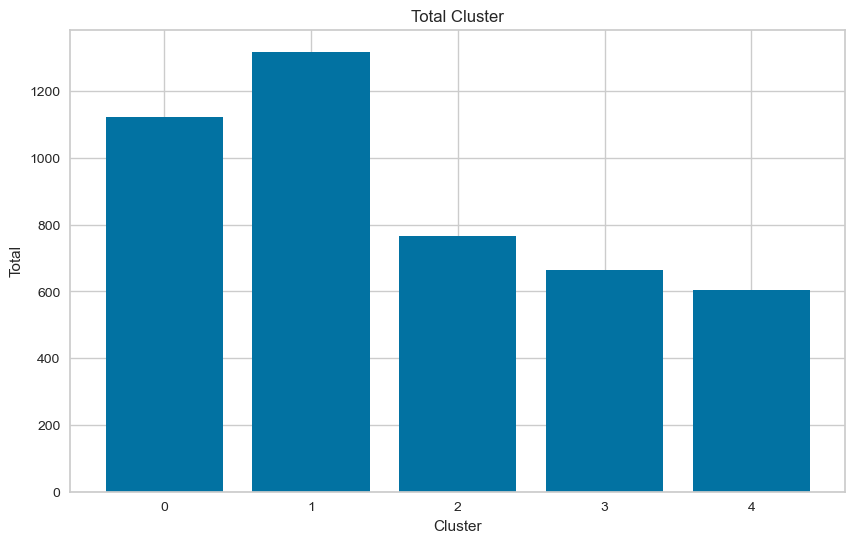

In [45]:
total_cluster = df['cluster'].value_counts().reset_index()

# Mengganti nama kolom agar sesuai
total_cluster.columns = ['cluster', 'total']

# Membuat barplot
plt.figure(figsize=(10, 6))
plt.bar(total_cluster['cluster'], total_cluster['total'])
plt.title('Total Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total')
plt.xticks(total_cluster['cluster'])
plt.grid(True)
plt.show()

Dari grafik diatas menunjukan bahwa cluster 1 memiliki nasabah terbanyak sedangkan cluster yang paling sedikit nasabahnya adalah cluster 4.

# x. Model Saving

In [46]:
# Save the trained scaler object using pickle for future use
with open('model_scaler.pkl', 'wb') as file_1:
  pickle.dump(scaler, file_1)

# Save the trained PCA (Principal Component Analysis) object using pickle for future use
with open('model_pca.pkl', 'wb') as file_2:
  pickle.dump(pca, file_2)

# Save the trained K-Means clustering model using pickle for future use
with open('model_km.pkl', 'wb') as file_3:
  pickle.dump(km, file_3)

# Save the list of numerical column names as a JSON file for future reference
with open('num_col.txt','w') as file_4:
  json.dump(numerical,file_4)

# xi. Model Inference

Penjelasan ada di notebook `(P1G6_Set_1_Inference_Alfarabi.ipynb)`

In [47]:
# Select rows from DataFrame where the 'cluster' column equals 4 and display the first few rows
df[df['cluster']==4].head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
2336,6223.173969,1.0,0.0,0.0,0.0,3607.876623,0.0,0.0,0.0,0.25,5,0,7500.0,1373.795303,1450.180855,0.000000,12,4
2338,4059.211725,1.0,0.0,0.0,0.0,4524.312762,0.0,0.0,0.0,0.25,4,0,5000.0,3246.575307,866.693315,0.000000,12,4
2347,1899.219514,1.0,0.0,0.0,0.0,3618.304773,0.0,0.0,0.0,0.25,4,0,8000.0,7823.096006,452.041254,0.000000,12,4
2352,1885.547591,1.0,0.0,0.0,0.0,3197.181617,0.0,0.0,0.0,0.25,11,0,8000.0,8559.584636,755.628834,0.166667,12,4
2357,3287.231954,1.0,0.0,0.0,0.0,3190.532048,0.0,0.0,0.0,0.25,3,0,8500.0,1339.969700,880.459505,0.000000,12,4


# xii. Overall Analysis

1. Dalam konteks analisis klastering kartu kredit, PCA dapat membantu mengurangi dimensi fitur, Metode Elbow dan Silhouette Score digunakan untuk menentukan jumlah klaster yang optimal, dan K-Means digunakan untuk melakukan klastering berdasarkan pola pengeluaran atau perilaku pengguna kartu kredit. Kombinasi teknik-teknik ini membantu dalam menggali wawasan yang berharga dari data kartu kredit untuk mendukung pengambilan keputusan bisnis yang lebih baik. 

2. **Kelebihan dan kelemahan Kmeans:**
    1. **Kelebihan Model KMeans untuk Analisis Kartu Kredit:**
    - Segmentasi Pelanggan: Model KMeans dapat digunakan untuk mengelompokkan pelanggan berdasarkan pola pengeluaran mereka. Ini memungkinkan perusahaan kartu kredit untuk memahami lebih baik preferensi dan kebutuhan pelanggan dalam berbagai segmen pasar.
    - Targeting Promosi yang Tepat: Dengan melakukan segmentasi pelanggan menggunakan KMeans, perusahaan dapat lebih efektif dalam menargetkan promosi atau penawaran khusus kepada setiap kelompok pelanggan. Hal ini dapat meningkatkan keberhasilan kampanye pemasaran.
    2. **Kelemahan Model KMeans dalam Analisis Kartu Kredit:**
    - Asumsi Bentuk dan Ukuran Klaster: KMeans berasumsi bahwa klaster memiliki bentuk bulat dan ukuran yang sama, yang mungkin tidak selalu berlaku untuk data kartu kredit. Pola pengeluaran dan perilaku pelanggan dapat sangat bervariasi dan kompleks.
    - Sensitivitas terhadap Jumlah Klaster: Pemilihan jumlah klaster (k) dalam KMeans dapat menjadi subjektif dan dapat mempengaruhi hasil segmentasi. Jumlah klaster yang salah dapat menghasilkan interpretasi yang tidak informatif atau tidak akurat.

3. Untuk meningkatkan model klastering dalam analisis kartu kredit menggunakan KMeans, langkah-langkah perbaikan yang dapat dilakukan adalah:

    - Eksplorasi Fitur Lebih Lanjut: Telusuri fitur-fitur tambahan yang dapat memberikan wawasan lebih dalam tentang perilaku pengguna kartu kredit.
    - Optimasi Jumlah Klaster: Evaluasi lebih lanjut terhadap jumlah klaster yang optimal menggunakan metode seperti Elbow Method atau Silhouette Score.
    - Pemrosesan Data yang Lebih Baik: Perbaiki pemrosesan data dengan menangani data yang hilang, outlier, dan normalisasi fitur-fitur yang digunakan.
    - Evaluasi Performa: Lakukan evaluasi performa model dengan metrik evaluasi yang komprehensif.
    - Penyesuaian Model Lain: Pertimbangkan penggunaan model klastering lain yang sesuai dengan karakteristik data kartu kredit.
    - Implementasi Tindak Lanjut: Terapkan wawasan yang diperoleh dalam kegiatan pemasaran, pengembangan produk, atau peningkatan layanan sesuai dengan kebutuhan setiap segmen pelanggan.
    - Monitoring dan Pembaruan Berkala: Tetapkan proses pemantauan dan pembaruan model secara berkala untuk menjaga relevansi dan efektivitas model terhadap perubahan data.

4. **Cluster Interpretation:**

Dari analisis klaster yang dilakukan terhadap data kartu kredit, berikut adalah kesimpulan untuk setiap klaster (cluster 0 hingga cluster 4):

**Cluster 0:**
- Memiliki saldo (balance) tinggi.
- Aktif dalam melakukan pembelian (purchases) dengan frekuensi tinggi.
- Lebih cenderung melakukan pembelian dengan cara satu kali (oneoff purchases) dan juga pembelian mencicil (installment purchases).
- Memiliki batas kredit (credit limit) yang tinggi.

Klaster 0 menunjukkan pola penggunaan kartu kredit yang aktif dengan saldo tinggi, sering melakukan pembelian baik satu kali maupun mencicil, dan memiliki batas kredit yang tinggi.

**Cluster 1:**
- Memiliki saldo (balance) rendah.
- Tidak aktif dalam melakukan pembelian (purchases) dengan frekuensi rendah.
- Jarang melakukan pembelian satu kali (oneoff purchases) maupun pembelian mencicil (installment purchases).
- Memiliki batas kredit (credit limit) yang rendah.

Klaster 1 menunjukkan pola penggunaan kartu kredit yang pasif dengan saldo rendah, jarang melakukan pembelian, dan memiliki batas kredit yang rendah.

**Cluster 2:**
- Memiliki saldo (balance) tinggi.
- Tidak aktif dalam melakukan pembelian (purchases) secara umum, namun cenderung melakukan pembelian mencicil (installment purchases).
- Memiliki batas kredit (credit limit) yang tinggi.

Klaster 2 menunjukkan pola penggunaan kartu kredit dengan saldo tinggi, meskipun kurang aktif dalam pembelian secara umum, namun lebih cenderung melakukan pembelian mencicil, dengan batas kredit yang tinggi.

**Cluster 3:**
- Memiliki saldo (balance) rendah.
- Tidak aktif dalam melakukan pembelian (purchases) dengan frekuensi rendah.
- Lebih cenderung melakukan pembelian hanya dalam bentuk mencicil (installment purchases).
- Memiliki batas kredit (credit limit) yang rendah.

Klaster 3 menunjukkan pola penggunaan kartu kredit yang pasif dengan saldo rendah, jarang melakukan pembelian, namun lebih cenderung melakukan pembelian mencicil, dengan batas kredit yang rendah.

**Cluster 4:**
- Memiliki saldo (balance) sangat tinggi.
- Tidak aktif dalam melakukan pembelian (purchases) secara umum.
- Jarang melakukan pembelian satu kali (oneoff purchases) maupun mencicil (installment purchases).
- Memiliki batas kredit (credit limit) yang tinggi.

Klaster 4 menunjukkan pola penggunaan kartu kredit dengan saldo sangat tinggi namun kurang aktif dalam melakukan pembelian, baik satu kali maupun mencicil, dengan batas kredit yang tinggi.

5. Dari analisis karakteristik klaster pengguna kartu kredit yang diperoleh, berikut business insight yang dapat diambil:

- **Segmentasi Pelanggan**: Identifikasi perbedaan dalam perilaku penggunaan kartu kredit antar klaster memungkinkan segmentasi pelanggan yang lebih efektif. Hal ini mendukung penyesuaian strategi pemasaran dan layanan sesuai dengan kebutuhan setiap segmen.

- **Targeting Promosi yang Tepat**: Memilih target promosi yang sesuai dengan karakteristik klaster dapat meningkatkan efisiensi dan efektivitas kampanye pemasaran. Klaster dengan profil tertentu dapat menjadi fokus untuk penawaran produk atau layanan yang relevan.

- **Penentuan Kebutuhan Produk**: Analisis klaster membantu dalam mengidentifikasi preferensi produk atau fitur kartu kredit yang diminati oleh masing-masing segmen. Ini memungkinkan pengembangan produk yang lebih tepat sasaran.

- **Manajemen Risiko dan Kredit**: Klaster dengan risiko kredit yang berbeda memerlukan pendekatan manajemen risiko yang disesuaikan. Profil risiko yang lebih tinggi memerlukan pengawasan lebih ketat, sementara klaster dengan risiko rendah dapat diberikan penawaran kredit yang lebih menguntungkan.

- **Optimasi Batas Kredit**: Penyesuaian batas kredit sesuai dengan profil klaster membantu dalam mengelola risiko kredit dan meningkatkan kepuasan pelanggan.

- **Penyesuaian Layanan dan Pengalaman Pelanggan**: Dengan memahami kebutuhan setiap klaster, perusahaan dapat menyediakan layanan dan pengalaman pelanggan yang lebih personal dan relevan.

# Conceptual Problem

1. Dalam algoritma K-Means, "inertia" adalah pengukuran yang digunakan untuk mengevaluasi seberapa baik klaster-klasternya berhasil dalam mengelompokkan data. Inertia dihitung sebagai jumlah total jarak kuadrat antara setiap titik data dengan pusat klaster terdekatnya. Tujuan utama dari algoritma K-Means adalah untuk meminimalkan nilai inertia ini dengan menempatkan pusat-pusat klaster sedemikian rupa sehingga jarak antara titik data dalam klaster dengan pusat klasternya seminimal mungkin. Semakin kecil nilai inertia, semakin baik model klasteringnya dalam memisahkan dan mengelompokkan data.

2. Metode Elbow digunakan untuk menentukan jumlah klaster optimal dalam algoritma klastering seperti K-Means. Langkahnya melibatkan menjalankan K-Means dengan berbagai jumlah klaster, menghitung nilai inertia (jumlah kuadrat jarak antara titik data dan pusat klaster), dan kemudian memplot nilai inertia terhadap jumlah klaster. Tujuan utamanya adalah untuk mengidentifikasi titik "elbow" di grafik, di mana penurunan nilai inertia mulai melambat secara signifikan. Titik ini menunjukkan jumlah klaster yang optimal. Kelebihannya adalah metode yang sederhana dan intuitif untuk menghindari overfitting atau underfitting model klastering, meskipun dapat sulit untuk menentukan titik elbow yang jelas terutama pada data yang kompleks.